# Environment Verification

Run this notebook to verify your development environment is set up correctly.

## 1. Python Environment

In [6]:
import sys
print(f"Python version: {sys.version}")
print(f"Python executable: {sys.executable}")

Python version: 3.11.14 (main, Feb  3 2026, 03:16:47) [GCC 12.2.0]
Python executable: /usr/local/bin/python3.11


## 2. Data Science Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print("✅ Data science libraries loaded successfully")

NumPy: 2.4.2
Pandas: 3.0.0
✅ Data science libraries loaded successfully


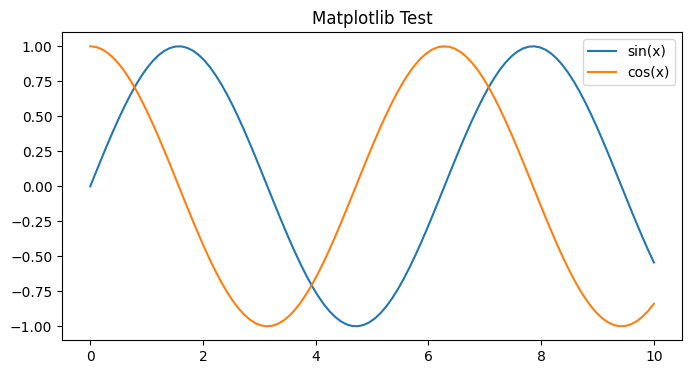

✅ Matplotlib rendering works


In [16]:
# Quick visualization test
x = np.linspace(0, 10, 100)
plt.figure(figsize=(8, 4))
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.legend()
plt.title('Matplotlib Test')
plt.show()
print("✅ Matplotlib rendering works")

## 3. Ollama Connection

In [9]:
import ollama
import os

# The OLLAMA_HOST environment variable should be set
print(f"OLLAMA_HOST: {os.environ.get('OLLAMA_HOST', 'not set')}")

try:
    # List available models
    response = ollama.list()
    print(f"\nAvailable models:")
    for model in response.models:
        print(f"  - {model.model}")
    print("\n✅ Ollama connection successful")
except Exception as e:
    print(f"❌ Ollama connection failed: {e}")
    print("\nMake sure Ollama is running on your Mac:")
    print("  ollama serve")

OLLAMA_HOST: http://host.docker.internal:11434

Available models:
  - llama3:latest
  - gemma3:latest

✅ Ollama connection successful


In [17]:
# Test a simple chat
try:
    response = ollama.chat(
        model='llama3',
        messages=[{'role': 'user', 'content': 'Say "Hello from Ollama!" and nothing else.'}]
    )
    print(f"Ollama says: {response['message']['content']}")
    print("\n✅ Ollama chat working")
except Exception as e:
    print(f"❌ Ollama chat failed: {e}")
    print("Make sure you have llama3 installed: ollama pull llama3")

Ollama says: Hello from Ollama!

✅ Ollama chat working


## 4. File System Access

In [12]:
import os

# Check we can see our projects
projects_dir = '/home/developer/projects'
print(f"Contents of {projects_dir}:")
for item in os.listdir(projects_dir):
    print(f"  {item}")
print("\n✅ Projects directory accessible")

Contents of /home/developer/projects:
  sandbox-experiments

✅ Projects directory accessible


In [13]:
# Verify we CAN'T access the host's home directory (sandboxing works)
try:
    os.listdir('/Users')
    print("⚠️ Warning: Can access /Users - sandboxing may not be working")
except (PermissionError, FileNotFoundError):
    print("✅ Correctly blocked from host filesystem (/Users not accessible)")

✅ Correctly blocked from host filesystem (/Users not accessible)


## 5. Network Access

In [14]:
import requests

try:
    response = requests.get('https://httpbin.org/ip', timeout=5)
    print(f"Your IP (via httpbin): {response.json()['origin']}")
    print("✅ Internet access working")
except Exception as e:
    print(f"❌ No internet access: {e}")

Your IP (via httpbin): 71.218.245.112
✅ Internet access working


## Summary

If all checks above show ✅, your environment is ready!

**Next steps:**
- Create new notebooks in `notebooks/`
- Write Python modules in `src/`
- Store data files in `data/`
- Use Ollama for LLM experiments